In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Social_Network_Ads ML Exercise

1) Read the dataset 'Social_Network_Ads.csv'<br>
2) Remove/handle null values<br>
3) Considering 'Age' and 'Estimated Salary' as input features and 'Purchased' as output feature, generate the following models after splitting the dataset into training and test dataset with test_size as 25%.<br>
a) Logistic Regression <br>
b) Decision Tree <br>
c) RandomForest <br>
d) KNN<br>
and predict the Purchased class label.<br>
4) Generate confusion matrix and classification report for each of these models.<br> 
5) Compute Accuracy score for each of these models.<br>
6) Scale the input features using feature Scaling and then repeat question 3, 4 and 5<br>

In [4]:
df = pd.read_csv('/content/Social_Network_Ads(1).csv')

In [5]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

###Remove/handle null values

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##Data visualization

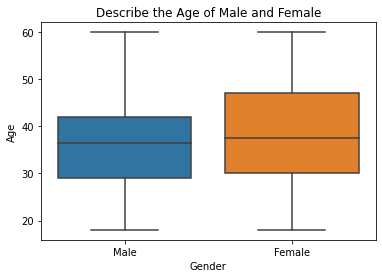

....................


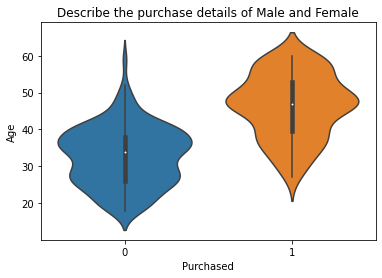

In [9]:
sns.boxplot(x=df['Gender'],y=df['Age'])
plt.title('Describe the Age of Male and Female')
# plt.legend()
plt.show()
print('....................')
sns.violinplot(x=df['Purchased'],y=df['Age'])
plt.title('Describe the purchase details of Male and Female')
plt.show()

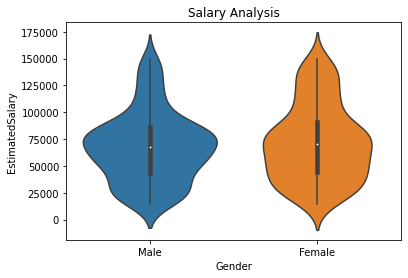

...................................


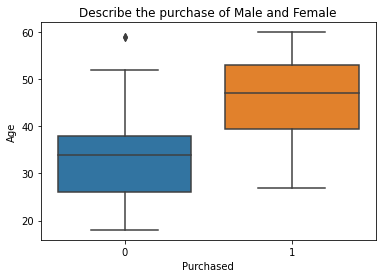

In [10]:
sns.violinplot(x=df['Gender'],y=df['EstimatedSalary'])
plt.title('Salary Analysis')
plt.show()
print('...................................')
sns.boxplot(x=df['Purchased'],y=df['Age'])
plt.title('Describe the purchase of Male and Female')
# plt.legend()
plt.show()

### Considering 'Age' and 'Estimated Salary' as input features and 'Purchased' as output feature, generate the following models after splitting the dataset into training and test dataset with test_size as 25%.

In [11]:
x = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [12]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [16]:
x_train.head()

,Age,EstimatedSalary
89,35,50000
238,46,82000
59,32,117000
170,21,88000
3,27,57000


In [17]:
y_test.head()

171    0
27     1
132    0
285    1
133    0
Name: Purchased, dtype: int64

**a) Logistic Regression
b) Decision Tree
c) RandomForest
d) KNN
and predict the Purchased class label.**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

error curve for predicting the K value

[0.0033333333333333335, 0.11666666666666667, 0.10666666666666667, 0.14, 0.14, 0.17666666666666667, 0.14333333333333334, 0.17666666666666667, 0.18, 0.18333333333333332, 0.18333333333333332, 0.18666666666666668, 0.18666666666666668, 0.18, 0.19333333333333333, 0.17, 0.19333333333333333, 0.21, 0.20666666666666667]
[0.17, 0.16, 0.19, 0.18, 0.18, 0.18, 0.14, 0.18, 0.19, 0.21, 0.2, 0.2, 0.18, 0.19, 0.18, 0.21, 0.21, 0.21, 0.19]


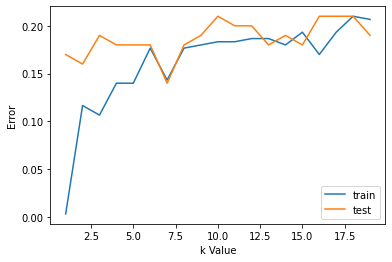

In [19]:
error1= []
error2= []
for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,20),error1,label="train")
plt.plot(range(1,20),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
print(error1)
print(error2)
plt.show()

In [20]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
rf = RandomForestClassifier(criterion='entropy',max_depth=4,min_samples_split=4)
knn = KNeighborsClassifier(n_neighbors=7,p=1)

In [21]:
model = [lr.fit(x_train,y_train),dtc.fit(x_train,y_train),rf.fit(x_train,y_train),knn.fit(x_train,y_train),'All the model is fitted']

In [22]:
model[4]

'All the model is fitted'

In [23]:
for i in model:
  print('fitting the model...: ',i)
# return i <= model[4]

fitting the model...:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
fitting the model...:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fitting the model...:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_lea

In [24]:
y_predlr = lr.predict(x_test)
y_preddtc = dtc.predict(x_test)
y_predrf = rf.predict(x_test)
y_predknn = knn.predict(x_test)
Prediction_purchased_class = [y_predlr,y_preddtc,y_predrf,y_predknn]
# pred = ['logistic regression','decision tree classifier','random forest classifier','kneighbors classifier']

In [25]:
for i in Prediction_purchased_class:
  print('Predicting the each model',i)

Predicting the each model [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicting the each model [1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
Predicting the each model [1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
Predicting the each model [1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


###Generate confusion matrix and classification report for each of these models. Compute Accuracy score for each of these models.

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
cm =[confusion_matrix(y_test,y_predlr),confusion_matrix(y_test,y_preddtc),confusion_matrix(y_test,y_predrf),confusion_matrix(y_test,y_predknn)]

In [63]:
for i in cm:
  print('confusion matrix')
  print(i)

confusion matrix
[[69  0]
 [31  0]]
confusion matrix
[[60  9]
 [ 4 27]]
confusion matrix
[[62  7]
 [ 3 28]]
confusion matrix
[[64  5]
 [ 9 22]]


In [29]:
cr = [classification_report(y_test,y_predlr),classification_report(y_test,y_preddtc),classification_report(y_test,y_predrf),classification_report(y_test,y_predknn)]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
for i  in cr:
  print('the classification report')
  print(i)


the classification report
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        69
           1       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100

the classification report
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        69
           1       0.75      0.87      0.81        31

    accuracy                           0.87       100
   macro avg       0.84      0.87      0.85       100
weighted avg       0.88      0.87      0.87       100

the classification report
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        69
           1       0.80      0.90      0.85        31

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       

In [126]:
# pred = ['logistic regression','decision tree classifier','random forest classifier','kneighbors classifier']

In [ ]:
# for i in cr:
  # for j in pred:
    # while j<=j[4]:
     print('the classification_report',j)
     break
return i

  # break

  # print(i)

In [33]:
print('accuracy score of logistic regression',accuracy_score(y_test,y_predlr))
print('accuracy score of Decision tree classifier',accuracy_score(y_test,y_preddtc))
print('accuracy score of random forest classifier',accuracy_score(y_test,y_predrf))
print('accuracy score of Kneighbors',accuracy_score(y_test,y_predknn))


accuracy score of logistic regression 0.69
accuracy score of Decision tree classifier 0.87
accuracy score of random forest classifier 0.9
accuracy score of Kneighbors 0.86


##Scale the input features using feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [79]:
x1 = sc.fit_transform(x)

In [80]:
x1

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [81]:
xs_train,xs_test,ys_train,ys_test = train_test_split(x1,y,test_size=0.25)

error curve for predicting k value

[0.006666666666666667, 0.08333333333333333, 0.07666666666666666, 0.08666666666666667, 0.08, 0.09, 0.08333333333333333, 0.09, 0.08333333333333333, 0.09, 0.08666666666666667, 0.09333333333333334, 0.09, 0.09, 0.08666666666666667, 0.09, 0.08666666666666667, 0.09333333333333334, 0.09333333333333334]
[0.13, 0.17, 0.09, 0.1, 0.1, 0.11, 0.09, 0.11, 0.1, 0.1, 0.1, 0.12, 0.11, 0.12, 0.1, 0.12, 0.11, 0.11, 0.11]


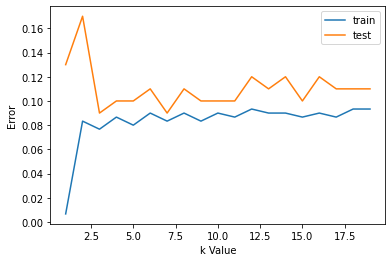

In [50]:
error1= []
error2= []
for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(xs_train,ys_train)
    ys_pred1= knn.predict(xs_train)
    error1.append(np.mean(ys_train!= ys_pred1))
    ys_pred2= knn.predict(xs_test)
    error2.append(np.mean(ys_test!= ys_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,20),error1,label="train")
plt.plot(range(1,20),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
print(error1)
print(error2)
plt.show()

In [83]:
lrs = LogisticRegression()
dtcs = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
rfs = RandomForestClassifier(criterion='entropy',max_depth=4,min_samples_split=4)
knns = KNeighborsClassifier(n_neighbors=17,p=1)

In [85]:
model_sc = [lrs.fit(xs_train,ys_train),dtcs.fit(xs_train,ys_train),rfs.fit(xs_train,ys_train),knns.fit(xs_train,ys_train),'All the model is fitted']

In [86]:
for i in model_sc:
  print('fitting the model...: ',i)

fitting the model...:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
fitting the model...:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fitting the model...:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_lea

In [87]:
y_predlrs = lrs.predict(xs_test)
y_preddtcs = dtcs.predict(xs_test)
y_predrfs = rfs.predict(xs_test)
y_predknns = knns.predict(xs_test)
Prediction_purchased_class = [y_predlrs,y_preddtcs,y_predrfs,y_predknns]

In [88]:
for i in Prediction_purchased_class:
  print('Predicting the each model',i)

Predicting the each model [1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0]
Predicting the each model [1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
Predicting the each model [1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
Predicting the each model [1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0]


###Generate confusion matrix and classification report for each of these models. Compute Accuracy score for each of these models

In [89]:
cms =[confusion_matrix(ys_test,y_predlrs),confusion_matrix(ys_test,y_preddtcs),confusion_matrix(ys_test,y_predrfs),confusion_matrix(ys_test,y_predknns)]

In [90]:
for i  in cms:
  print('the confusion matrix')
  print(i)


the confusion matrix
[[53  3]
 [14 30]]
the confusion matrix
[[48  8]
 [ 3 41]]
the confusion matrix
[[47  9]
 [ 2 42]]
the confusion matrix
[[46 10]
 [ 7 37]]


In [91]:
crs = [classification_report(ys_test,y_predlrs),classification_report(ys_test,y_preddtcs),classification_report(ys_test,y_predrfs),classification_report(ys_test,y_predknns)]
for i in crs:
  print('the classification report')
  print(i)

the classification report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        56
           1       0.91      0.68      0.78        44

    accuracy                           0.83       100
   macro avg       0.85      0.81      0.82       100
weighted avg       0.84      0.83      0.83       100

the classification report
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        56
           1       0.84      0.93      0.88        44

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100

the classification report
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        56
           1       0.82      0.95      0.88        44

    accuracy                           0.89       100
   macro avg       0.89      0.90      0.89       

#with scaling score

In [92]:
print('accuracy score of logistic regression',accuracy_score(ys_test,y_predlrs))
print('accuracy score of Decision tree classifier',accuracy_score(ys_test,y_preddtcs))
print('accuracy score of random forest classifier',accuracy_score(ys_test,y_predrfs))
print('accuracy score of Kneighbors',accuracy_score(ys_test,y_predknns))

accuracy score of logistic regression 0.83
accuracy score of Decision tree classifier 0.89
accuracy score of random forest classifier 0.89
accuracy score of Kneighbors 0.83


#without Scaling score

In [78]:
print('accuracy score of logistic regression',accuracy_score(y_test,y_predlr))
print('accuracy score of Decision tree classifier',accuracy_score(y_test,y_preddtc))
print('accuracy score of random forest classifier',accuracy_score(y_test,y_predrf))
print('accuracy score of Kneighbors',accuracy_score(y_test,y_predknn))

accuracy score of logistic regression 0.69
accuracy score of Decision tree classifier 0.87
accuracy score of random forest classifier 0.9
accuracy score of Kneighbors 0.86


#*============================================End==========================================================*